In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import datetime
import math
from math import isnan
from datetime import date
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the list of tickers
df = pd.read_csv('Nifty_100.csv', header= 0)
Tickers = df["Symbol"]
Tickers = Tickers.astype(str) + ".NS"
Tickers = list(Tickers)

In [3]:
#Start Date for the analysis
start_date = "2010-01-01"
today = datetime.datetime.today()

In [4]:
#Downloading Data
Data = yf.download(Tickers, start=start_date, period="1d", interval= "1wk", threads =True, group_by = "ticker")

[*********************100%***********************]  100 of 100 completed


In [5]:
Data

SBICARD.NS                                                      \
                 Open         High          Low        Close    Adj Close   
Date                                                                        
2009-12-28        NaN          NaN          NaN          NaN          NaN   
2010-01-04        NaN          NaN          NaN          NaN          NaN   
2010-01-11        NaN          NaN          NaN          NaN          NaN   
2010-01-18        NaN          NaN          NaN          NaN          NaN   
2010-01-19        NaN          NaN          NaN          NaN          NaN   
...               ...          ...          ...          ...          ...   
2021-08-05        NaN          NaN          NaN          NaN          NaN   
2021-08-09     1022.0  1038.900024   995.000000  1029.900024  1029.900024   
2021-08-11        NaN          NaN          NaN          NaN          NaN   
2021-08-12        NaN          NaN          NaN          NaN          NaN   
2021-08-13     1026.0  1036.599976  1023.349976  1029.900024  1029.900024   

                      AUROPHARMA.NS                                      ...  \
               Volume          Open        High         Low       Close  ...   
Date                                                                     ...   
2009-12-28        NaN     91.184998   91.184998   91.184998   91.184998  ...   
2010-01-04        NaN     91.500000   94.489998   88.199997   89.635002  ...   
2010-01-11        NaN     90.000000   91.769997   86.620003   90.099998  ...   
2010-01-18        NaN     90.400002   91.199997   87.099998   90.514999  ...   
2010-01-19        NaN           NaN         NaN         NaN         NaN  ...   
...               ...           ...         ...         ...         ...  ...   
2021-08-05        NaN           NaN         NaN         NaN         NaN  ...   
2021-08-09  3967345.0    900.000000  902.950012  754.000000  761.299988  ...   
2021-08-11        NaN           NaN         NaN         NaN         NaN  ...   
2021-08-12        NaN           NaN         NaN         NaN         NaN  ...   
2021-08-13   670629.0    806.000000  822.000000  754.000000  761.299988  ...   

               BPCL.NS                                     BAJAJ-AUTO.NS  \
                   Low       Close   Adj Close      Volume          Open   
Date                                                                       
2009-12-28  105.916664  105.916664   66.804321         0.0    877.400024   
2010-01-04  102.349998  104.925003   66.178848  23915154.0    882.500000   
2010-01-11  102.500000  102.891663   64.896370  20557566.0    831.500000   
2010-01-18   90.666664   95.291664   60.102856  15571284.0    867.500000   
2010-01-19         NaN         NaN         NaN         NaN           NaN   
...                ...         ...         ...         ...           ...   
2021-08-05         NaN         NaN         NaN         NaN           NaN   
2021-08-09  440.549988  454.899994  454.899994  24544131.0   3858.149902   
2021-08-11         NaN         NaN         NaN         NaN           NaN   
2021-08-12         NaN         NaN         NaN         NaN           NaN   
2021-08-13  448.299988  454.899994  454.899994   7110804.0   3780.000000   

                                                                           
                   High          Low        Close    Adj Close     Volume  
Date                                                                       
2009-12-28   877.400024   877.400024   877.400024   647.453857        0.0  
2010-01-04   886.474976   820.025024   827.625000   610.723877  2006370.0  
2010-01-11   873.724976   820.000000   863.450012   637.159912  3125950.0  
2010-01-18   918.275024   856.400024   893.400024   659.260620  2186018.0  
2010-01-19          NaN          NaN          NaN          NaN        NaN  
...                 ...          ...          ...          ...        ...  
2021-08-05          NaN          NaN          NaN          NaN

In [6]:
Data["SBIN.NS"].isnull().Open.sum()

619

In [7]:
#Dropping Excess Entries from the weekly dataframe
Drop_List = np.array([])
i = 0
while(i < Data.shape[0]-2):
    if(Data.index[i+1] != Data.index[i] + timedelta(days =7)):
        Data = Data.drop(Data.index[i+1], axis = 0)
        continue
    i = i + 1


In [8]:
Data["SBIN.NS"].isnull().Open.sum()

0

In [9]:
Data["ICICIGI.NS"].isnull().Open.sum()

404

In [10]:
stock = np.array([])
empty = np.array([])
for i in Tickers:
    empty = np.append(empty,Data[i].isnull().Close.sum())
    stock = np.append(stock, i)
new_row = {"Stock" : stock, "Empty_Values" : empty}   
Null = pd.DataFrame(new_row)  

In [11]:
Null[Null.Empty_Values > 0].count()

Stock           19
Empty_Values    19
dtype: int64

In [12]:
#Stocks with Missing Data.
Null[Null.Empty_Values > 0]

,Stock,Empty_Values
3,ADANIGREEN.NS,442.0
5,ADANITRANS.NS,291.0
6,ALKEM.NS,312.0
11,DMART.NS,377.0
17,BANDHANBNK.NS,430.0
26,COALINDIA.NS,44.0
34,GLAND.NS,568.0
38,HDFCAMC.NS,449.0
40,HDFCLIFE.NS,411.0
46,HDFC.NS,101.0


In [13]:
Data.shape

(608, 600)

In [14]:
#Dropping stocks with missing values greater than 300
Drop_List = list(Null[Null.Empty_Values > 100].Stock.unique())
Data = Data.drop(Drop_List, axis= 1)

for i in range(len(Drop_List)):
    Tickers.remove(Drop_List[i])
    
#Number of stocks left after cleaning
len(Tickers)

84

In [15]:
#Data.drop(Data.index[0:-1:2], axis = 0 )
#Drop odd Index to make the period of Dataframe = 2 Weeks
#odd = np.array([])
#for i in range(1, int(Data.shape[0]/2) + 1):
#    odd = np.append(odd, int(2*i - 1) )
    

In [16]:

i = 0

#Code to make period of dataframe = 2 weeks
while(i <= Data.shape[0] - 2):
    Data = Data.drop(Data.index[i+1], axis = 0)
    i = i + 1

#Code to make period of dataframe = 3 weeks  
#while(i <= Data.shape[0] - 2):
#    Data = Data.drop(Data.index[i+1], axis = 0)
#    Data = Data.drop(Data.index[i+1], axis = 0)
#    i = i + 1

Data = Data.drop(Data.index[0], axis = 0)  

In [17]:
Data

AUROPHARMA.NS                                                   \
                    Open         High         Low       Close   Adj Close   
Date                                                                        
2010-01-11     90.000000    91.769997   86.620003   90.099998   83.396515   
2010-01-25     90.099998    91.400002   81.000000   84.290001   78.018776   
2010-02-08     88.584999    94.300003   87.964996   93.495003   86.822235   
2010-02-22     92.699997    93.599998   89.995003   91.275002   84.760696   
2010-03-08     98.389999    98.989998   95.224998   97.129997   90.197807   
...                  ...          ...         ...         ...         ...   
2021-06-14   1014.599976  1018.000000  917.750000  952.450012  952.450012   
2021-06-28    952.099976  1013.000000  952.099976  994.200012  994.200012   
2021-07-12    956.000000   978.849976  938.200012  975.549988  975.549988   
2021-07-26    968.450012   968.450012  877.049988  916.599976  916.599976   
2021-08-09    900.000000   902.950012  754.000000  761.299988  761.299988   

                       INDUSINDBK.NS                                         \
                Volume          Open         High          Low        Close   
Date                                                                          
2010-01-11   6018590.0    143.050003   144.350006   135.949997   141.750000   
2010-01-25  13075780.0    151.000000   152.000000   136.750000   147.899994   
2010-02-08  11266170.0    151.699997   153.000000   144.000000   149.850006   
2010-02-22   6761970.0    158.500000   160.800003   146.149994   148.899994   
2010-03-08   7406300.0    161.399994   163.800003   154.600006   162.100006   
...                ...           ...          ...          ...          ...   
2021-06-14  13084996.0   1012.000000  1050.000000   960.000000   995.400024   
2021-06-28  13263901.0   1019.000000  1027.550049  1000.000000  1009.650024   
2021-07-12   8032482.0   1045.400024  1067.400024  1041.050049  1044.300049   
2021-07-26   9365305.0    989.299988  1009.799988   963.049988   981.000000   
2021-08-09  29053885.0   1031.000000  1055.000000  1020.000000  1024.150024   

            ...     BPCL.NS                                     BAJAJ-AUTO.NS  \
            ...         Low       Close   Adj Close      Volume          Open   
Date        ...                                                                 
2010-01-11  ...  102.500000  102.891663   64.896370  20557566.0    831.500000   
2010-01-25  ...   87.841667   90.141663   56.854610  13252296.0    893.099976   
2010-02-08  ...   92.933334   94.375000   59.524700  13715922.0    865.000000   
2010-02-22  ...   93.058334   93.991669   59.282909  26442138.0    915.000000   
2010-03-08  ...   87.166664   87.791664   55.372421  17613354.0    955.250000   
...         ...         ...         ...         ...         ...           ...   
2021-06-14  ...  466.750000  472.350006  472.350006  19487394.0   4173.000000   
2021-06-28  ...  461.049988  462.750000  462.750000  13353533.0   4196.149902   
2021-07-12  ...  445.049988  448.000000  448.000000  16542131.0   4018.000000   
2021-07-26  ...  444.899994  445.500000  445.500000  16867521.0   3852.000000   
2021-08-09  ...  440.549988  454.899994  454.899994  24544131.0   3858.149902   

                                                                           
                   High          Low        Close    Adj Close     Volume  
Date                                                                       
2010-01-11   873.724976   820.000000   863.450012   637.159912  3125950.0  
2010-01-25   916.299988   828.500000   873.849976   644.834229  3050744.0  
2010-02-08   899.474976   843.174988   894.375000   659.980103  1586506.0  
2010-02-22   917.525024   849.200012   908.825012   670.643066  2299564.0  
2010-03-08   966.500000   898.049988   921.049988   679.664246  1934022.0  
...                 ...          ...          ...          ...        ...  
2021-0

In [18]:
#Make PCT Change Data Frame
PCT = pd.DataFrame(columns = Tickers)

for ticker in Tickers:
    six_month_change = np.array([])
    for i in range(11,len(Data)):
        six_month_change = np.append(six_month_change, (Data[ticker]["Close"][i] - Data[ticker]["Close"][i-11])/Data[ticker]["Close"][i]  )
    PCT[ticker] = six_month_change
PCT.index = Data.index[11:]    
Data = Data[11:]

In [19]:
PCT

,ACC.NS,ABBOTINDIA.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,UPL.NS,ULTRACEMCO.NS,UBL.NS,MCDOWELL-N.NS,VEDL.NS,WIPRO.NS,YESBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-14,-0.137687,0.288380,0.111766,0.091412,0.037808,0.099056,0.214704,-0.058319,0.110359,0.243102,...,-0.545461,0.310253,0.267316,0.123752,-0.080044,0.279178,-0.007521,-0.163133,-0.077978,0.045731
2010-06-28,-0.010023,0.369521,0.175119,0.167494,0.097117,0.092850,0.201913,0.082058,0.170951,0.288135,...,-0.327464,0.353812,0.209335,0.147559,-0.068290,0.312139,0.029547,0.000432,-0.008221,0.069268
2010-07-12,-0.088196,0.341565,0.103709,0.152160,0.019752,0.155019,0.213925,0.069424,0.238699,0.257580,...,-0.220262,0.349875,0.215775,0.136325,-0.184357,0.247637,0.048884,-0.114931,0.021952,0.207213
2010-07-26,-0.110830,0.205169,0.166567,0.069461,0.092105,0.128882,0.304761,0.058875,0.162976,0.323791,...,-0.272279,0.377628,0.228383,0.178067,-0.203901,0.435620,0.022274,-0.108235,0.014068,0.199729
2010-08-09,-0.184242,0.234122,0.234102,0.123519,0.001715,0.102656,0.277410,-0.022475,0.133376,0.307429,...,-0.274305,0.395446,0.071797,0.163545,-0.240139,0.455577,-0.001376,-0.224547,-0.026578,0.209502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,0.141920,0.093165,0.645513,0.239649,0.226194,0.195297,0.149744,0.017271,0.083458,0.140817,...,0.059214,0.136767,0.064189,0.353280,0.185490,0.052387,0.058045,0.302205,0.202346,-0.280000
2021-06-28,0.192930,0.151664,0.643719,0.282517,0.282682,0.313926,0.198885,0.089469,0.116899,0.040607,...,0.117496,0.190597,0.115986,0.298618,0.207243,0.101548,0.126425,0.384659,0.224099,-0.162362
2021-07-12,0.170756,0.174175,0.484808,0.103258,0.275682,0.272816,0.168334,0.046743,0.026908,-0.051908,...,0.101482,0.118648,0.130034,0.360277,0.127792,0.134402,0.149461,0.330826,0.234963,-0.223881


In [20]:
Data

AUROPHARMA.NS                                                   \
                    Open         High         Low       Close   Adj Close   
Date                                                                        
2010-06-14     82.599998    86.195000   82.125000   85.135002   79.058914   
2010-06-28     86.000000    93.599998   85.404999   91.824997   85.271408   
2010-07-12     94.699997   101.000000   94.470001  100.470001   93.299454   
2010-07-26     94.910004    99.599998   91.815002   96.985001   90.063148   
2010-08-09     95.889999    97.974998   93.800003   94.995003   88.215187   
...                  ...          ...         ...         ...         ...   
2021-06-14   1014.599976  1018.000000  917.750000  952.450012  952.450012   
2021-06-28    952.099976  1013.000000  952.099976  994.200012  994.200012   
2021-07-12    956.000000   978.849976  938.200012  975.549988  975.549988   
2021-07-26    968.450012   968.450012  877.049988  916.599976  916.599976   
2021-08-09    900.000000   902.950012  754.000000  761.299988  761.299988   

                       INDUSINDBK.NS                                         \
                Volume          Open         High          Low        Close   
Date                                                                          
2010-06-14  10442190.0    191.250000   196.350006   187.550003   195.250000   
2010-06-28  11286120.0    195.199997   208.500000   195.199997   205.949997   
2010-07-12   9773110.0    216.000000   219.750000   207.000000   212.350006   
2010-07-26   6315450.0    214.600006   214.800003   202.000000   204.250000   
2010-08-09   9052320.0    208.699997   226.500000   206.600006   223.750000   
...                ...           ...          ...          ...          ...   
2021-06-14  13084996.0   1012.000000  1050.000000   960.000000   995.400024   
2021-06-28  13263901.0   1019.000000  1027.550049  1000.000000  1009.650024   
2021-07-12   8032482.0   1045.400024  1067.400024  1041.050049  1044.300049   
2021-07-26   9365305.0    989.299988  1009.799988   963.049988   981.000000   
2021-08-09  29053885.0   1031.000000  1055.000000  1020.000000  1024.150024   

            ...     BPCL.NS                                       \
            ...         Low       Close   Adj Close       Volume   
Date        ...                                                    
2010-06-14  ...   85.925003   86.949997   54.841549   26148018.0   
2010-06-28  ...  100.866669  111.125000   70.089340  164327052.0   
2010-07-12  ...  104.333336  110.175003   69.490135   76467120.0   
2010-07-26  ...  103.566666  106.925003   67.440315   36757056.0   
2010-08-09  ...  107.308334  111.808334   70.520325   40040748.0   
...         ...         ...         ...         ...          ...   
2021-06-14  ...  466.750000  472.350006  472.350006   19487394.0   
2021-06-28  ...  461.049988  462.750000  462.750000   13353533.0   
2021-07-12  ...  445.049988  448.000000  448.000000   16542131.0   
2021-07-26  ...  444.899994  445.500000  445.500000   16867521.0   
2021-08-09  ...  440.549988  454.899994  454.899994   24544131.0   

           BAJAJ-AUTO.NS                                                      \
                    Open         High          Low        Close    Adj Close   
Date                                                                           
2010-06-14   1149.500000  1157.500000  1120.500000  1140.775024   841.804504   
2010-06-28   1202.500000  1254.400024  1198.050049  1227.550049   905.837769   
2010-07-12   1217.500000  1262.500000  1198.000000  1204.675049   903.963440   
2010-07-26   1245.000000  1367.425049  1231.500000  1344.000000  1008.510132   
2010-08-09   1355.099976  1372.500000  1267.250000  1329.900024   997.929688   
...                  ...          ...          ...          ...          ...   
2021-06-14   4173.000000  4195.500000  4030.000000  4167.100098  4027.807129   
2021-06-28   4196.149902  4250.000000  4117.000000  4175.350098  4035.78

In [22]:

#Active Trades shows current active trades
#Trades show total trades taken 

Trades = pd.DataFrame(columns =["Date", "Stock", "Buy/Sell", "Profit/Loss", "Amount", "Shares"])
investment = 1000000
available_balance = 0
Active_Trades = pd.DataFrame(columns =["Buy_Date", "Stock", "Buy_Amount", "Current_Amount", "Shares"])
balance = 0
equity = np.array([])

#Loop on each row 
for j in range(Data.shape[0]):
    
    if(PCT.index[j-1].year < PCT.index[j].year ):
        equity = np.append(equity, (Active_Trades["Current_Amount"] * Active_Trades["Shares"]).sum() )
    
    val = PCT.iloc[j,:].values
    names = PCT.columns
    top10 = dict()
    
    #Sort the pct change of a particular week of all stocks
    for i in range(len(names)):
        top10[names[i]] = val[i]
    top10 = sorted(top10.items(), key=lambda item: item[1], reverse = True)

    
    stocks = np.array([])
    pct_change = np.array([]) 
    close = np.array([])
    date = np.array([])
    for i in range(len(top10)):
        stocks = np.append(stocks, top10[i][0])
        pct_change = np.append(pct_change, top10[i][1])
        close   =  np.append(close, Data[top10[i][0]]["Close"][j])
        date = np.append(date, Data[top10[i][0]].index[j])

    
    #Make 2 Dataframes final and total final, final has only top 15 stocks of the week and total final has all the stocks
    final = {"Date" : date, "Stock": stocks, "PCT": pct_change, "Close" : close}
    final = pd.DataFrame(final)
    Total_Final = final.dropna().reset_index(drop = True)
    final = final.dropna()[:15].reset_index(drop = True)
    
    buy_price = np.array([])
    stock_name = np.array([])
    total_investment_in_stock = np.array([])
    buy_date = np.array([])    

    #Selling Phase
    if(Active_Trades.empty == False): #At first the dataframe will be empty
        i = 0
        while(i < Active_Trades.shape[0]):
            if(final[final["Stock"] == Active_Trades["Stock"][i]].empty == True):  #Sell the stock if it is not in top 15
                
                hist_stock = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Stock
                hist_sell  = Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][i]].Close               #Selling Price
                hist_buy   = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Amount      #Buying Price
                hist_bs    = "Sell"
                hist_date  = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Buy_Date
                hist_shares = Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].Shares
                
                if(hist_sell.unique()[0] > hist_buy.unique()[0]):
                    hist_pl = "Profit"
                    hist_amount = hist_sell.unique()[0] - hist_buy.unique()[0]
                else:
                    hist_pl = "Loss"
                    hist_amount = hist_sell.unique()[0] - hist_buy.unique()[0] 
                
                investment = investment + int(hist_shares.unique()[0] * hist_sell.unique()[0])
                #Remove the stock from active trades
                Active_Trades = Active_Trades.drop( Active_Trades[Active_Trades["Stock"] == Active_Trades["Stock"][i]].index, axis = 0)
                Active_Trades = Active_Trades.reset_index(drop = True)
                
                hist = {"Date": hist_date, "Stock": hist_stock, "Buy/Sell": hist_bs, "Profit/Loss": hist_pl, "Amount" : hist_amount, "Shares": hist_shares}
                
                hist = pd.DataFrame(hist)
                Trades = Trades.append(hist, ignore_index= True)  #Adding the sold stock info in trades dataframe
                Trades = Trades.reset_index(drop = True)
                
            i = i + 1    
    
    
    
    i = 0
    
    #Buying Phase
    equal_investment = 10 - Active_Trades.shape[0]
    while(Active_Trades.shape[0] < 10 and i < 15):
        if(investment < 0):
            break
        
        if(Active_Trades.shape[0] != 10):
            
            if(Active_Trades[Active_Trades["Stock"] == final["Stock"][i]].empty == False): #If stock is already present in the active trades then continue the loop
                i = i + 1
                Active_Trades[Active_Trades["Stock"] == final["Stock"][i]].Current_Amount = final["Close"][i]
                continue
        
        
        stock_name =  final["Stock"][i]
        buy_date   = final["Date"][i]
        buy_price = final["Close"][i]
        
        
        total_investment_in_stock =  int(investment/(equal_investment * final["Close"][i])) * final["Close"][i]
        buy_shares                =  int(investment/(equal_investment * final["Close"][i] ))
        investment = investment - investment/equal_investment
        i = i + 1
        
        Temp = {"Date": buy_date, "Stock": stock_name, "Buy/Sell": "Buy", "Profit/Loss": "NIL", "Amount" : buy_price, "Shares": buy_shares}
        
        #temp_available_balance = investment - total_investment_in_stock.sum()
        Trades = Trades.append(Temp, ignore_index = True)
        
        Temp1 = {"Buy_Date": buy_date, "Stock": stock_name, "Buy_Amount": buy_price, "Current_Amount" : buy_price, "Shares": buy_shares}
        
        Active_Trades  = Active_Trades.append(Temp1, ignore_index = True)
        
       
    #Updating the current price of all the active stocks
    for z in range(Active_Trades.shape[0]):
        if(Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][z]].empty == True):
            continue
        Active_Trades["Current_Amount"][z] = Total_Final[Total_Final["Stock"] == Active_Trades["Stock"][z]].Close
        
    
    #available_balance = available_balance + temp_available_balance
    

In [23]:
Active_Trades

,Buy_Date,Stock,Buy_Amount,Current_Amount,Shares
0,2020-08-24,ADANIENT.NS,288.250000,1437.000000,2287
1,2020-11-16,TATASTEEL.NS,532.900024,1461.650024,1353
2,2021-02-22,HINDALCO.NS,340.250000,442.049988,1510
3,2021-03-08,VEDL.NS,221.399994,328.649994,1654
4,2021-04-05,JSWSTEEL.NS,621.000000,749.049988,1081
5,2021-07-12,UPL.NS,837.549988,779.099976,459
6,2021-07-12,AMBUJACEM.NS,383.049988,402.450012,502
7,2021-07-26,BAJAJFINSV.NS,14222.200195,14317.500000,66
8,2021-07-26,DIVISLAB.NS,4906.100098,4948.700195,95
9,2021-08-09,WIPRO.NS,615.500000,615.500000,1231


In [24]:
Trades

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares
0,2010-06-14,EICHERMOT.NS,Buy,NIL,92.214996,1084
1,2010-06-14,CADILAHC.NS,Buy,NIL,127.550003,705
2,2010-06-14,ABBOTINDIA.NS,Buy,NIL,1120.050049,72
3,2010-06-14,BAJFINANCE.NS,Buy,NIL,46.140392,1579
4,2010-06-14,INDUSINDBK.NS,Buy,NIL,195.250000,336
...,...,...,...,...,...,...
921,2021-06-28,PEL.NS,Sell,Loss,-86.149902,305
922,2021-07-26,BAJAJFINSV.NS,Buy,NIL,14222.200195,66
923,2021-07-26,DIVISLAB.NS,Buy,NIL,4906.100098,95
924,2021-04-19,NMDC.NS,Sell,Profit,33.100006,1676


In [25]:
#Total Profitable Trades
Trades[Trades["Profit/Loss"] == "Profit"]

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares
12,2010-06-14,INDUSINDBK.NS,Sell,Profit,17.100006,336
20,2010-06-14,ABBOTINDIA.NS,Sell,Profit,22.449951,72
22,2010-06-14,GODREJCP.NS,Sell,Profit,17.583344,461
23,2010-07-26,ASIANPAINT.NS,Sell,Profit,7.240021,203
26,2010-08-09,BAJAJFINSV.NS,Sell,Profit,5.501801,186
...,...,...,...,...,...,...
914,2020-11-16,TATAMOTORS.NS,Sell,Profit,175.799988,2132
916,2020-12-28,ADANIPORTS.NS,Sell,Profit,183.749969,414
917,2021-02-08,SBIN.NS,Sell,Profit,36.850006,1128
920,2021-01-11,GRASIM.NS,Sell,Profit,518.299927,632


In [26]:
Trades["Final_Amount"] = Trades["Amount"] * Trades["Shares"]

In [27]:
Trades

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares,Final_Amount
0,2010-06-14,EICHERMOT.NS,Buy,NIL,92.214996,1084,99961.05603
1,2010-06-14,CADILAHC.NS,Buy,NIL,127.550003,705,89922.752151
2,2010-06-14,ABBOTINDIA.NS,Buy,NIL,1120.050049,72,80643.603516
3,2010-06-14,BAJFINANCE.NS,Buy,NIL,46.140392,1579,72855.679447
4,2010-06-14,INDUSINDBK.NS,Buy,NIL,195.250000,336,65604.0
...,...,...,...,...,...,...,...
921,2021-06-28,PEL.NS,Sell,Loss,-86.149902,305,-26275.720215
922,2021-07-26,BAJAJFINSV.NS,Buy,NIL,14222.200195,66,938665.212891
923,2021-07-26,DIVISLAB.NS,Buy,NIL,4906.100098,95,466079.509277
924,2021-04-19,NMDC.NS,Sell,Profit,33.100006,1676,55475.610229


In [28]:
Trades[Trades["Profit/Loss"] == "Loss"]

,Date,Stock,Buy/Sell,Profit/Loss,Amount,Shares,Final_Amount
10,2010-06-14,ASIANPAINT.NS,Sell,Loss,-6.294998,200,-1258.999634
13,2010-06-14,HEROMOTOCO.NS,Sell,Loss,-41.099976,19,-780.899536
16,2010-07-12,DIVISLAB.NS,Sell,Loss,-17.799988,69,-1228.199158
18,2010-06-14,CADILAHC.NS,Sell,Loss,-3.250000,705,-2291.25
29,2010-10-18,HAVELLS.NS,Sell,Loss,-0.080002,1420,-113.6026
...,...,...,...,...,...,...,...
882,2020-09-21,HCLTECH.NS,Sell,Loss,-8.450012,1219,-10300.56488
886,2020-10-05,WIPRO.NS,Sell,Loss,-10.450012,883,-9227.360779
897,2020-12-28,JUBLFOOD.NS,Sell,Loss,-59.750000,168,-10038.0
901,2020-12-28,ASIANPAINT.NS,Sell,Loss,-368.199951,112,-41238.394531


In [29]:
Trades.describe()

,Amount
count,926.000000
mean,1042.390737
std,5345.432195
min,-4515.445312
25%,1.049995
50%,130.380592
75%,521.392899
max,78091.351562


In [30]:

year_wise = pd.DataFrame(columns= ["Year", "Returns"])
sold_stocks = Trades[Trades["Buy/Sell"] == "Sell"]
sold_stocks = sold_stocks.reset_index(drop = True)

for i in range(len(sold_stocks)):
    sold_stocks["Date"][i] = sold_stocks["Date"][i].date().year
    


In [31]:
sold_stocks = sold_stocks.drop(["Amount", "Shares", "Stock", "Buy/Sell", "Profit/Loss"], axis =1)

In [32]:
sold_stocks

,Date,Final_Amount
0,2010,-1258.999634
1,2010,5745.602051
2,2010,-780.899536
3,2010,-1228.199158
4,2010,-2291.25
...,...,...
453,2020,76072.487366
454,2021,41566.806885
455,2021,327565.553711
456,2021,-26275.720215


In [33]:
total_years = sold_stocks.Date.unique()

In [34]:
investment

0.0

In [35]:
yearwise = pd.DataFrame()
year = np.array([])
total_profit = np.array([])
for i in range(len(total_years)):
    year = np.append(year,total_years[i])
    total_profit = np.append(total_profit, sold_stocks[sold_stocks["Date"] == total_years[i]].Final_Amount.sum())
    
equity = np.append(equity, (Active_Trades["Shares"]* Active_Trades["Current_Amount"]).sum())
yearwise["Year"] = year
yearwise["Total"] = total_profit
yearwise["Equity"] = equity
pd.set_option('display.float_format', lambda x: '%.5f' % x)
yearwise


,Year,Total,Equity
0,2010.00000,-59833.80485,981187.27161
1,2011.00000,-16671.28551,866431.73253
2,2012.00000,218437.20310,1053995.46611
3,2013.00000,473545.44173,1256779.26242
4,2014.00000,973390.49680,2143600.93073
5,2015.00000,-225443.37980,2168078.71834
6,2016.00000,626977.11269,2494846.95673
7,2017.00000,1197171.18761,3709654.79152
8,2018.00000,46612.11577,3702834.79607
9,2019.00000,3190.27180,3883783.27489


In [36]:
investment

0.0

<AxesSubplot:xlabel='Year'>

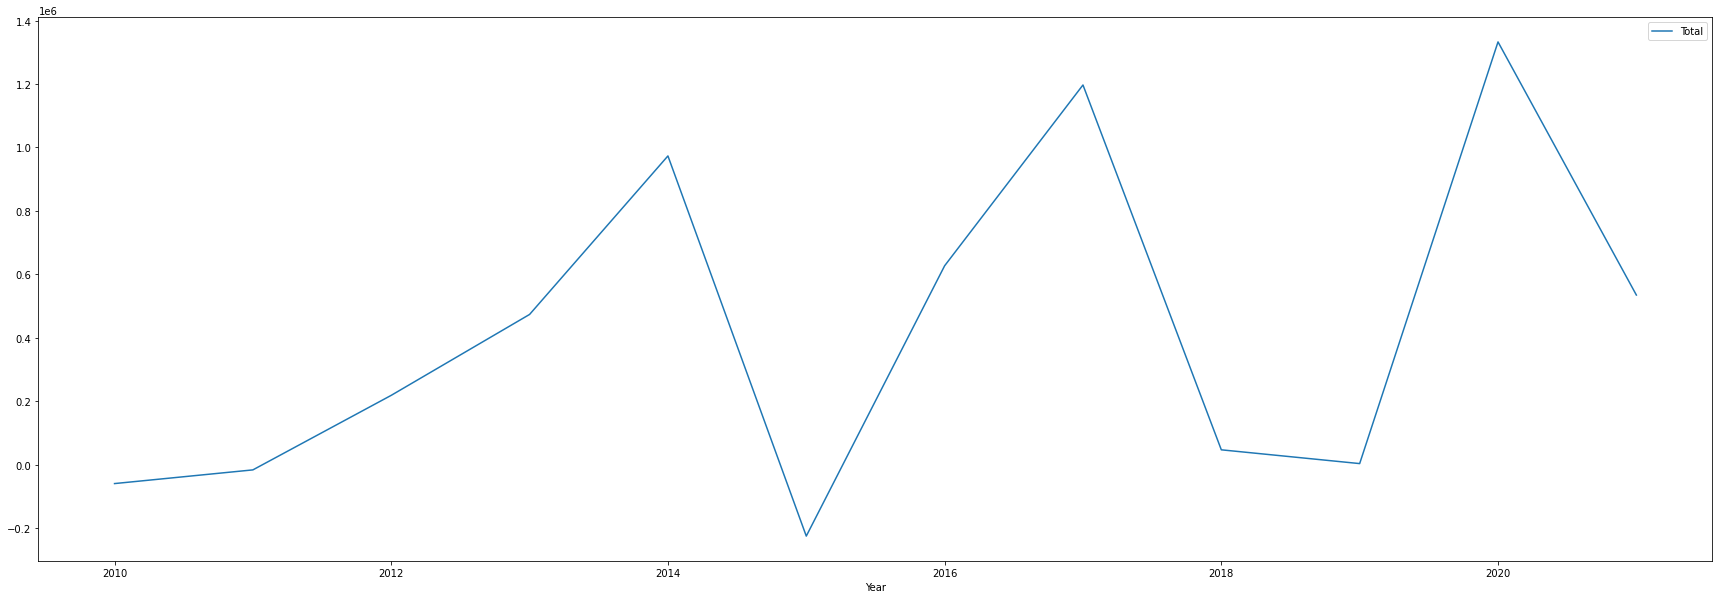

In [37]:
yearwise.plot(y = ["Total"], x= "Year", figsize=(30,10))

<AxesSubplot:xlabel='Year'>

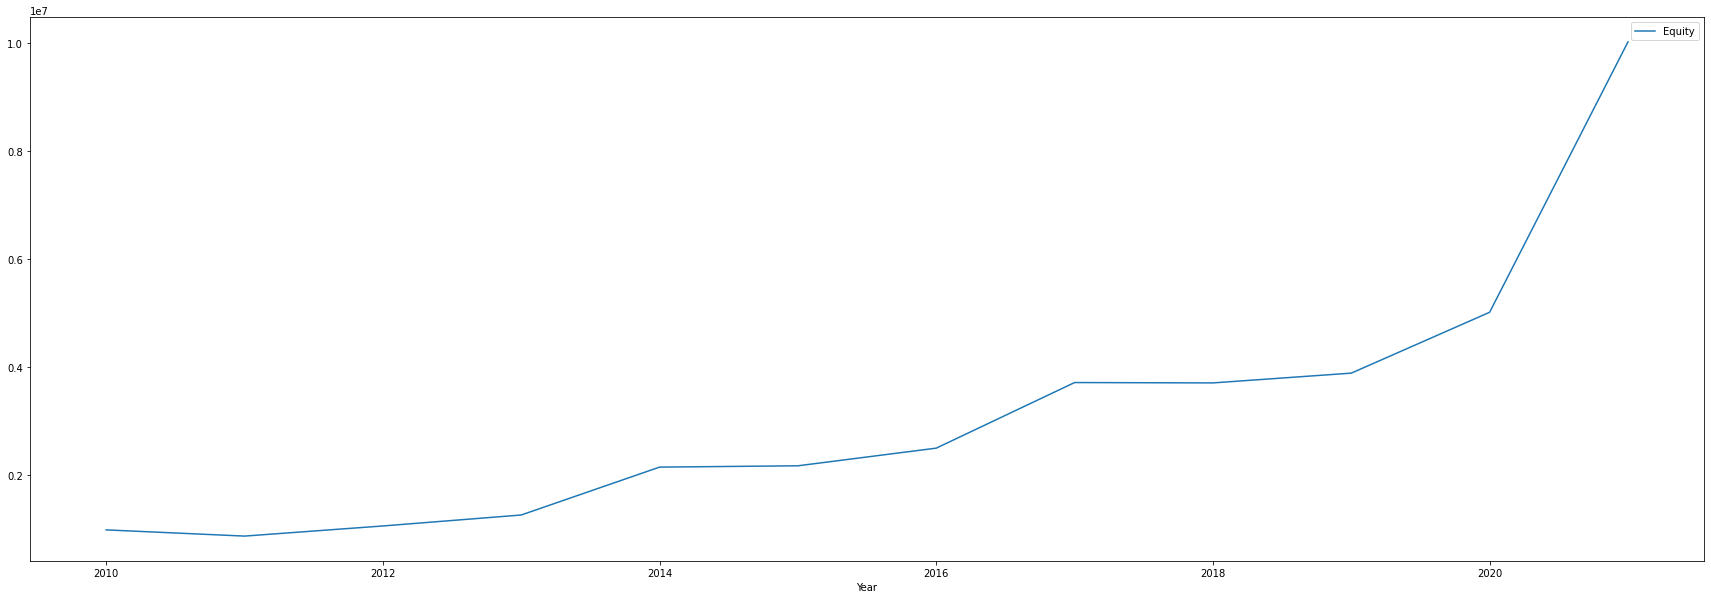

In [38]:
yearwise.plot(y = ["Equity"], x= "Year", figsize=(30,10))